In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# merge mobility data and poi count results

In [3]:
mobility=pd.read_csv(r'data/sz/mobility3/sz_living_working_stats_class_without0.csv')
mobility

,FID,name,合计,POINT_X,POINT_Y,house_price,class,living_number,towork_avg_dis,towork_avg_time,towork_ave_spd,working_number,fromhomw_avg_dis,fromhome_avg_time,fromhome_avg_spd
0,2,人民桥,4141,114.107222,22.543346,24695.199220,1,2614,12.958879,35.249879,0.488680,19106,14.676919,38.860511,0.411640
1,3,红岭,8138,114.106345,22.554773,32797.101560,1,4709,10.914710,28.206515,0.470080,1959,10.054754,31.083402,0.436367
2,4,红南,6738,114.102381,22.550613,31337.000000,1,4017,11.618853,27.824567,0.482331,6432,12.159923,34.437794,0.454208
3,6,滨苑,5329,114.101974,22.540225,23495.699220,2,16318,14.064198,35.190479,0.484141,27123,14.457798,30.980312,0.470798
4,8,桂园老围,6560,114.101407,22.546298,35098.398440,1,4728,12.438896,27.517167,0.504588,14639,13.708011,37.969075,0.416080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,774,海月,13903,114.241429,22.567262,2207.229981,3,3011,17.943212,41.677269,0.550712,10785,19.847586,42.576517,0.573685
573,775,海涛,8511,114.230542,22.551088,13624.599610,3,4260,19.774877,43.747888,0.553279,2911,19.800253,48.256390,0.552014
574,777,南坑南坑,10945,114.063741,22.607212,11863.400390,3,43950,13.706657,36.500010,0.426169,49471,13.810700,39.293814,0.409202
575,778,红棉,2809,114.175082,22.643314,26895.900390,1,9912,16.333751,41.123267,0.492482,5420,15.088132,40.390168,0.536313


In [6]:
C1workingnc = pd.read_csv(r'data/sz/mobility3/C1_workingnc_number.csv')
C2workingnc = pd.read_csv(r'data/sz/mobility3/C2_workingnc_number.csv')
C3workingnc = pd.read_csv(r'data/sz/mobility3/C3_workingnc_number.csv')

In [7]:
C1workingnc

,WorkingNC,working_number
0,2,4974
1,3,459
2,4,1506
3,6,7798
4,8,4626
...,...,...
567,774,536
568,775,266
569,777,7104
570,778,970


In [8]:
mobilityC = mobility.loc[:, ['FID','name','living_number','working_number']]
mobilityC = mobilityC.rename(columns={"working_number": "job_number", "living_number": "population"})
mobilityC

,FID,name,population,job_number
0,2,人民桥,2614,19106
1,3,红岭,4709,1959
2,4,红南,4017,6432
3,6,滨苑,16318,27123
4,8,桂园老围,4728,14639
...,...,...,...,...
572,774,海月,3011,10785
573,775,海涛,4260,2911
574,777,南坑南坑,43950,49471
575,778,红棉,9912,5420


In [18]:
mobilityC_job = mobilityC.drop(['population'],axis =1)
mobilityC_job

,FID,name,job_number
0,2,人民桥,19106
1,3,红岭,1959
2,4,红南,6432
3,6,滨苑,27123
4,8,桂园老围,14639
...,...,...,...
572,774,海月,10785
573,775,海涛,2911
574,777,南坑南坑,49471
575,778,红棉,5420


In [13]:
POI2018 = pd.read_csv(r'data/poi2018/szpoi2018_wgs/count_poi2018sz.csv')
POI2018 = POI2018.drop(['Unnamed: 0'],axis =1)
POI2018

,id,catering,edu,finance,firm,gov,health,hotel,landscape,living,public,residence,shopping,sports,traffic,vehicle
0,0,22,24,29,86,32,4,31,6,28,2,20,25,9,46,0
1,1,28,40,6,46,23,5,19,0,35,4,31,27,15,33,1
2,2,116,70,102,160,26,31,189,9,167,61,66,644,34,132,1
3,3,110,39,20,15,19,32,50,2,93,5,26,121,11,62,1
4,4,88,52,46,51,108,27,158,2,127,8,46,161,18,123,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,776,8,33,4,3,5,2,0,6,9,4,24,4,7,26,0
777,777,154,85,28,87,40,38,7,10,89,11,88,173,46,73,8
778,778,29,43,9,18,14,13,0,2,40,0,28,53,13,44,2
779,779,18,6,6,3,4,11,4,0,22,0,4,34,10,15,1


In [20]:
C1workingnc_poi = pd.merge(C1workingnc, POI2018, left_on=['WorkingNC'],right_on= ['id'],how='left')
C1workingnc_poi_job = pd.merge(C1workingnc_poi, mobilityC_job, left_on=['WorkingNC'],right_on= ['FID'],how='left')
C1workingnc_poi_job = C1workingnc_poi_job.drop(['id','FID'],axis =1)
C1workingnc_poi_job

,WorkingNC,working_number,catering,edu,finance,firm,gov,health,hotel,landscape,living,public,residence,shopping,sports,traffic,vehicle,name,job_number
0,2,4974,116,70,102,160,26,31,189,9,167,61,66,644,34,132,1,人民桥,19106
1,3,459,110,39,20,15,19,32,50,2,93,5,26,121,11,62,1,红岭,1959
2,4,1506,88,52,46,51,108,27,158,2,127,8,46,161,18,123,0,红南,6432
3,6,7798,79,19,17,11,35,15,20,2,41,9,30,67,9,97,1,滨苑,27123
4,8,4626,194,34,153,76,23,16,95,4,157,22,47,209,39,108,0,桂园老围,14639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,774,536,33,22,6,114,46,7,12,2,35,7,48,54,8,67,9,海月,10785
568,775,266,15,19,11,13,101,11,1,0,13,2,16,39,3,39,1,海涛,2911
569,777,7104,154,85,28,87,40,38,7,10,89,11,88,173,46,73,8,南坑南坑,49471
570,778,970,29,43,9,18,14,13,0,2,40,0,28,53,13,44,2,红棉,5420


In [97]:
C1workingnc_poi_job.sum()

Unnamed: 0                                                   163306
WorkingNC                                                    235423
working_number                                              1785204
catering                                                      63522
edu                                                           35196
finance                                                       21937
firm                                                          56093
gov                                                           24871
health                                                        19034
hotel                                                         21496
landscape                                                      6113
living                                                        57700
public                                                         9765
residence                                                     37366
shopping                                        

In [21]:
C2workingnc_poi = pd.merge(C2workingnc, POI2018, left_on=['WorkingNC'],right_on= ['id'],how='left')
C2workingnc_poi_job = pd.merge(C2workingnc_poi, mobilityC_job, left_on=['WorkingNC'],right_on= ['FID'],how='left')
C2workingnc_poi_job = C2workingnc_poi_job.drop(['id','FID'],axis =1)
C2workingnc_poi_job

,WorkingNC,working_number,catering,edu,finance,firm,gov,health,hotel,landscape,living,public,residence,shopping,sports,traffic,vehicle,name,job_number
0,2,10066,116,70,102,160,26,31,189,9,167,61,66,644,34,132,1,人民桥,19106
1,3,915,110,39,20,15,19,32,50,2,93,5,26,121,11,62,1,红岭,1959
2,4,3596,88,52,46,51,108,27,158,2,127,8,46,161,18,123,0,红南,6432
3,6,14169,79,19,17,11,35,15,20,2,41,9,30,67,9,97,1,滨苑,27123
4,8,7464,194,34,153,76,23,16,95,4,157,22,47,209,39,108,0,桂园老围,14639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,774,2375,33,22,6,114,46,7,12,2,35,7,48,54,8,67,9,海月,10785
572,775,743,15,19,11,13,101,11,1,0,13,2,16,39,3,39,1,海涛,2911
573,777,33042,154,85,28,87,40,38,7,10,89,11,88,173,46,73,8,南坑南坑,49471
574,778,2919,29,43,9,18,14,13,0,2,40,0,28,53,13,44,2,红棉,5420


In [22]:
C3workingnc_poi = pd.merge(C3workingnc, POI2018, left_on=['WorkingNC'],right_on= ['id'],how='left')
C3workingnc_poi_job = pd.merge(C3workingnc_poi, mobilityC_job, left_on=['WorkingNC'],right_on= ['FID'],how='left')
C3workingnc_poi_job = C3workingnc_poi_job.drop(['id','FID'],axis =1)
C3workingnc_poi_job

,WorkingNC,working_number,catering,edu,finance,firm,gov,health,hotel,landscape,living,public,residence,shopping,sports,traffic,vehicle,name,job_number
0,2,4066,116,70,102,160,26,31,189,9,167,61,66,644,34,132,1,人民桥,19106
1,3,585,110,39,20,15,19,32,50,2,93,5,26,121,11,62,1,红岭,1959
2,4,1330,88,52,46,51,108,27,158,2,127,8,46,161,18,123,0,红南,6432
3,6,5156,79,19,17,11,35,15,20,2,41,9,30,67,9,97,1,滨苑,27123
4,8,2549,194,34,153,76,23,16,95,4,157,22,47,209,39,108,0,桂园老围,14639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,774,7874,33,22,6,114,46,7,12,2,35,7,48,54,8,67,9,海月,10785
572,775,1902,15,19,11,13,101,11,1,0,13,2,16,39,3,39,1,海涛,2911
573,777,9325,154,85,28,87,40,38,7,10,89,11,88,173,46,73,8,南坑南坑,49471
574,778,1531,29,43,9,18,14,13,0,2,40,0,28,53,13,44,2,红棉,5420


In [23]:
C1workingnc_poi_job.to_csv('data/sz/mobility3/C1workingnc_2018poi_job.csv')
C2workingnc_poi_job.to_csv('data/sz/mobility3/C2workingnc_2018poi_job.csv')
C3workingnc_poi_job.to_csv('data/sz/mobility3/C3workingnc_2018poi_job.csv')

# Read files

In [ ]:
C1workingnc_poi_job=pd.read_csv(r'data/sz/mobility3/C1workingnc_2018poi_job.csv')
C2workingnc_poi_job=pd.read_csv(r'data/sz/mobility3/C2workingnc_2018poi_job.csv')
C3workingnc_poi_job=pd.read_csv(r'data/sz/mobility3/C3workingnc_2018poi_job.csv')

In [ ]:
C1workingnc_poi_job.dtypes 

Unnamed: 0          int64
WorkingNC         float64
working_number    float64
catering            int64
edu                 int64
finance             int64
firm                int64
gov                 int64
health              int64
hotel               int64
landscape           int64
living              int64
public              int64
residence           int64
shopping            int64
sports              int64
traffic             int64
vehicle             int64
name               object
job_number          int64
dtype: object

In [ ]:
C1workingnc_poi_job

,Unnamed: 0,WorkingNC,working_number,catering,edu,finance,firm,gov,health,hotel,landscape,living,public,residence,shopping,sports,traffic,vehicle,name,job_number
0,0,2.0,4974.0,116,70,102,160,26,31,189,9,167,61,66,644,34,132,1,人民桥,19106
1,1,3.0,459.0,110,39,20,15,19,32,50,2,93,5,26,121,11,62,1,红岭,1959
2,2,4.0,1506.0,88,52,46,51,108,27,158,2,127,8,46,161,18,123,0,红南,6432
3,3,6.0,7798.0,79,19,17,11,35,15,20,2,41,9,30,67,9,97,1,滨苑,27123
4,4,8.0,4626.0,194,34,153,76,23,16,95,4,157,22,47,209,39,108,0,桂园老围,14639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,567,774.0,536.0,33,22,6,114,46,7,12,2,35,7,48,54,8,67,9,海月,10785
568,568,775.0,266.0,15,19,11,13,101,11,1,0,13,2,16,39,3,39,1,海涛,2911
569,569,777.0,7104.0,154,85,28,87,40,38,7,10,89,11,88,173,46,73,8,南坑南坑,49471
570,570,778.0,919.0,29,43,9,18,14,13,0,2,40,0,28,53,13,44,2,红棉,5420


In [29]:
dfC1 = C1workingnc_poi_job.drop(['Unnamed: 0','name'], axis=1)
dfC2 = C2workingnc_poi_job.drop(['Unnamed: 0','name'], axis=1)
dfC3 = C3workingnc_poi_job.drop(['Unnamed: 0','name'], axis=1)

In [30]:
dfC1

,WorkingNC,working_number,catering,edu,finance,firm,gov,health,hotel,landscape,living,public,residence,shopping,sports,traffic,vehicle,job_number
0,2,4974,116,70,102,160,26,31,189,9,167,61,66,644,34,132,1,19106
1,3,459,110,39,20,15,19,32,50,2,93,5,26,121,11,62,1,1959
2,4,1506,88,52,46,51,108,27,158,2,127,8,46,161,18,123,0,6432
3,6,7798,79,19,17,11,35,15,20,2,41,9,30,67,9,97,1,27123
4,8,4626,194,34,153,76,23,16,95,4,157,22,47,209,39,108,0,14639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,774,536,33,22,6,114,46,7,12,2,35,7,48,54,8,67,9,10785
568,775,266,15,19,11,13,101,11,1,0,13,2,16,39,3,39,1,2911
569,777,7104,154,85,28,87,40,38,7,10,89,11,88,173,46,73,8,49471
570,778,970,29,43,9,18,14,13,0,2,40,0,28,53,13,44,2,5420


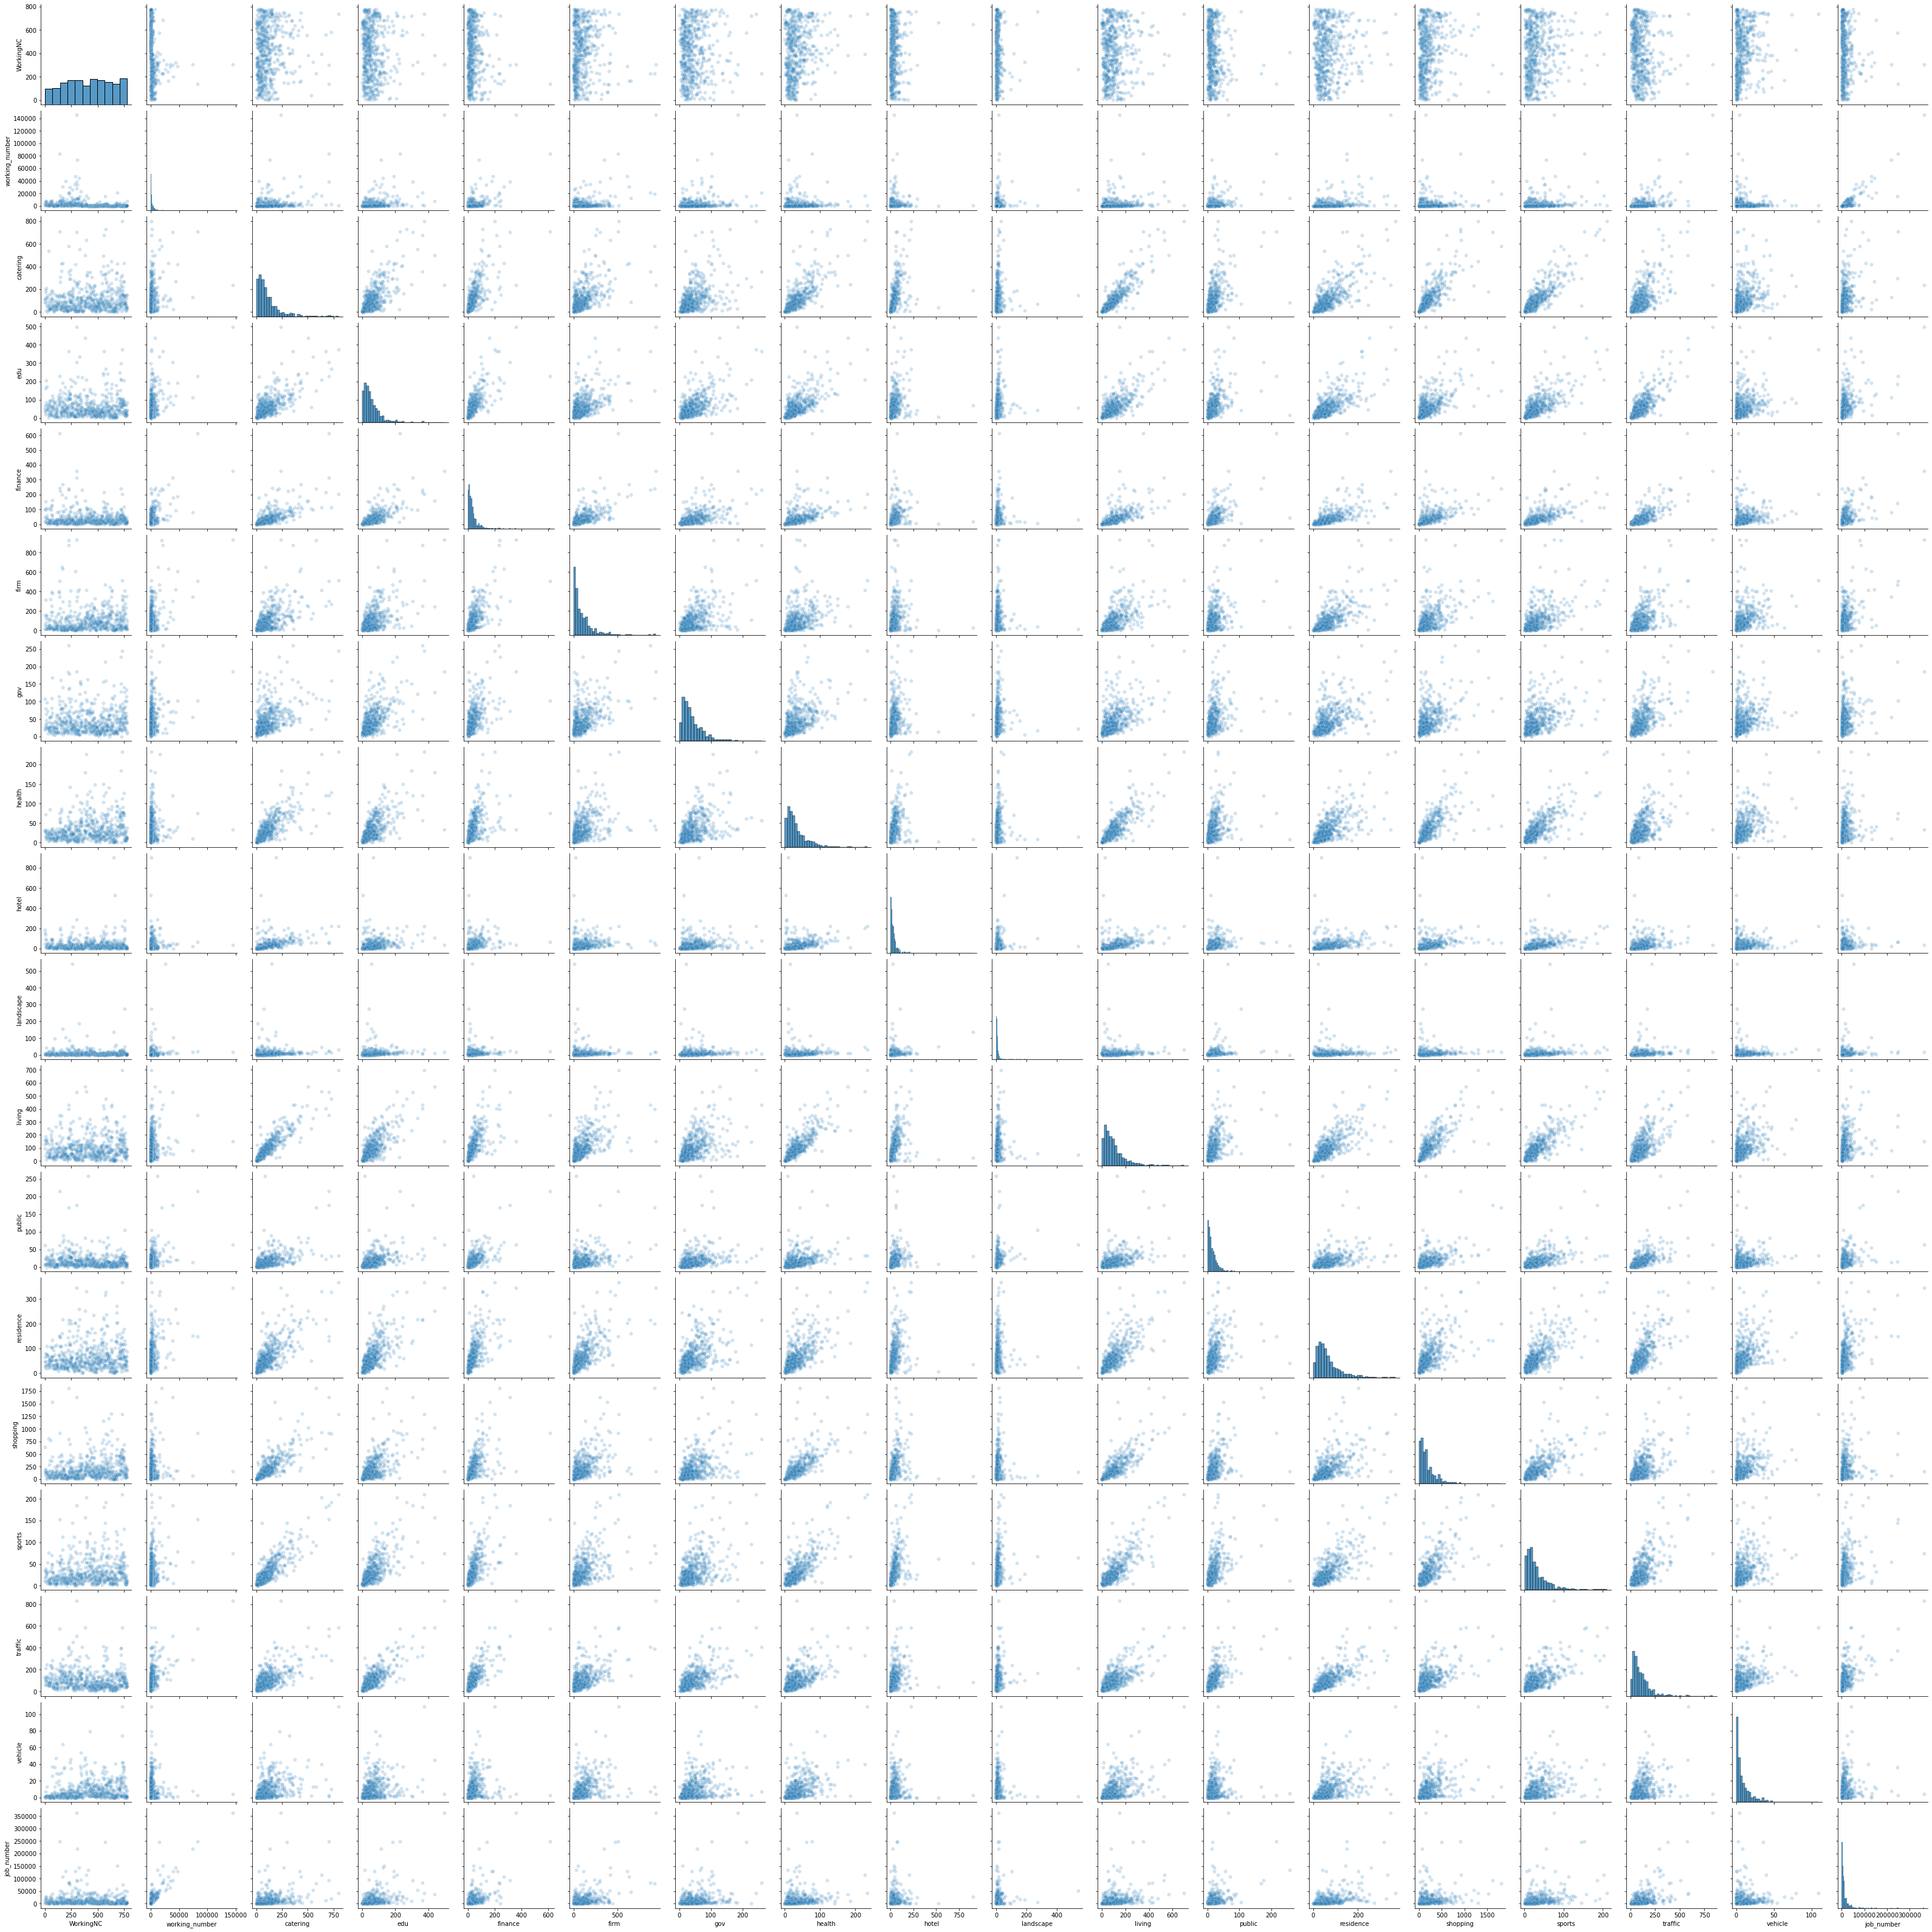

In [31]:
sns.pairplot(dfC1, plot_kws={'alpha':0.2})

Text(0.5, 1.0, 'Correlation Matrix C1')

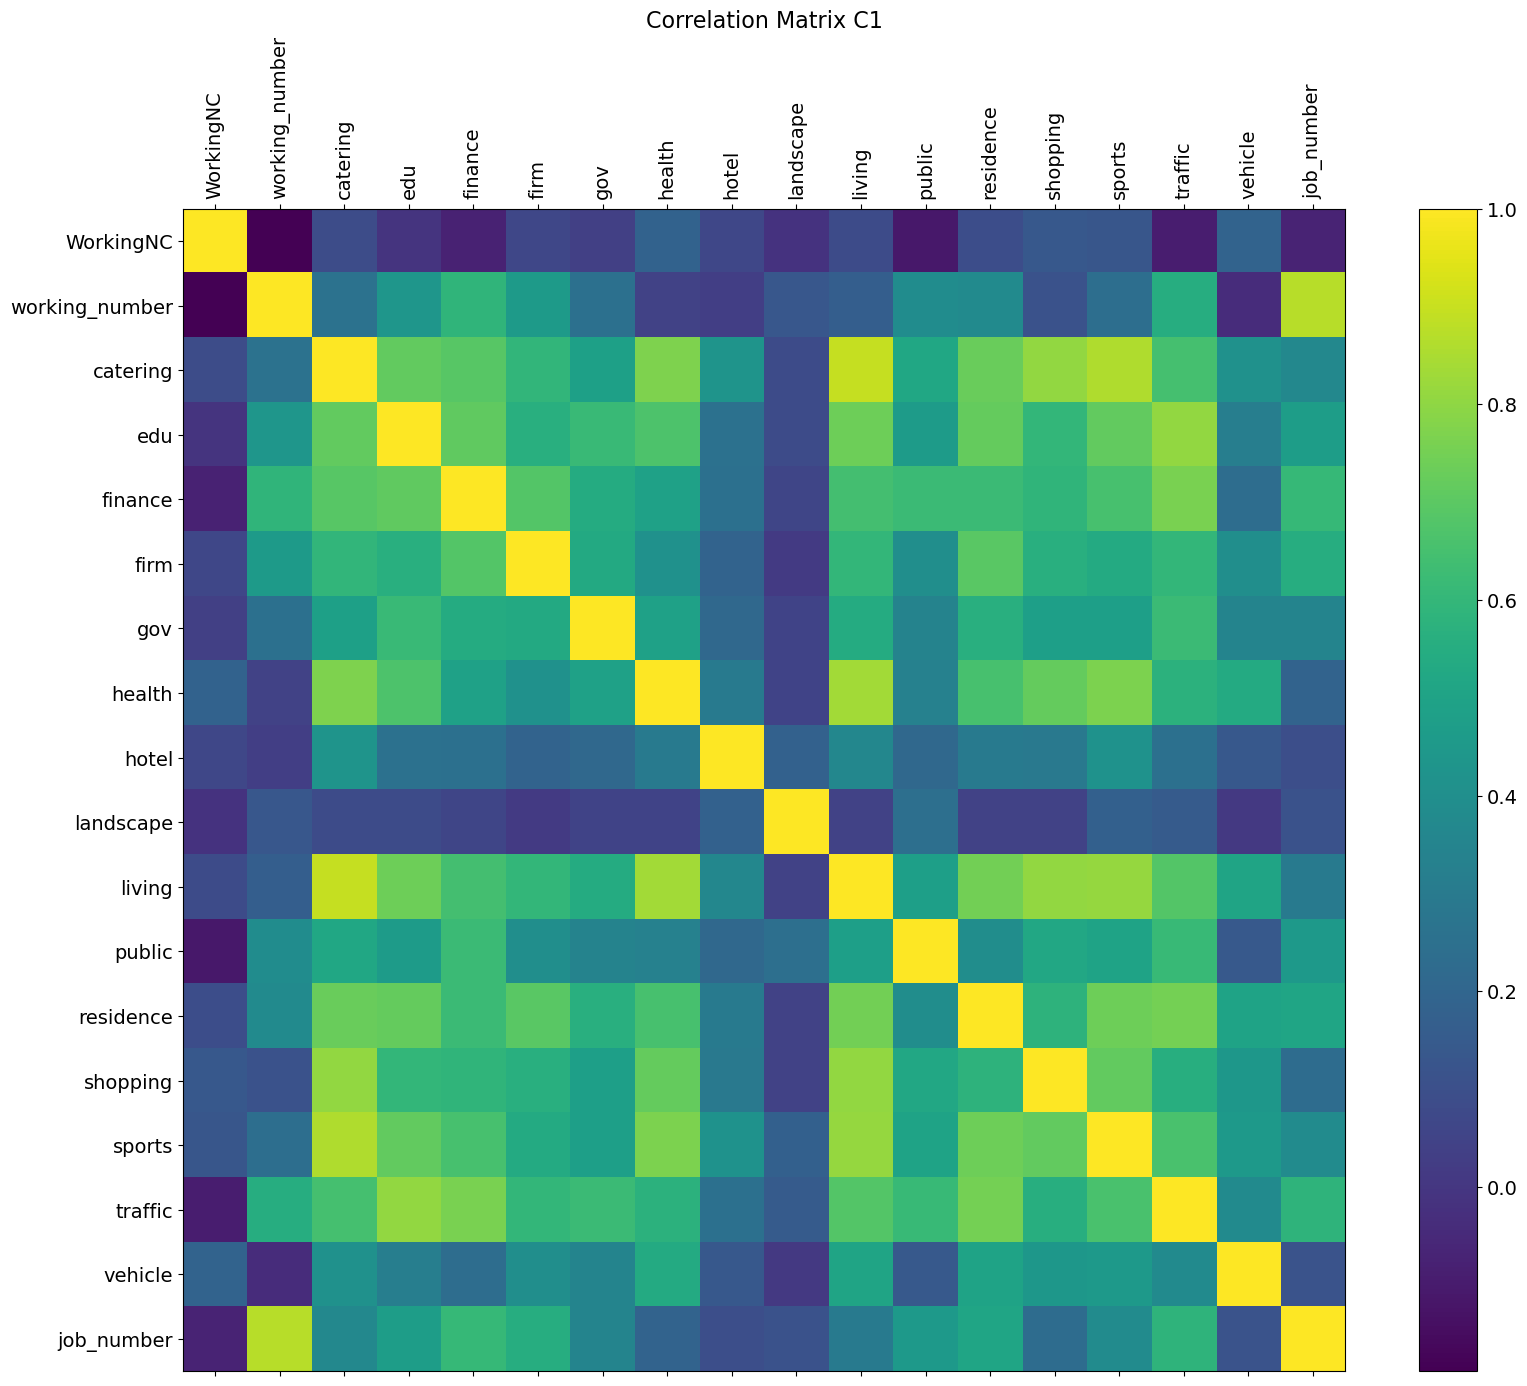

In [32]:
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(dfC1.corr(), fignum=f.number)
plt.xticks(range(dfC1.shape[1]), dfC1.columns, fontsize=14, rotation=90)
plt.yticks(range(dfC1.shape[1]), dfC1.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix C1', fontsize=16)

Text(0.5, 1.0, 'Correlation Matrix C2')

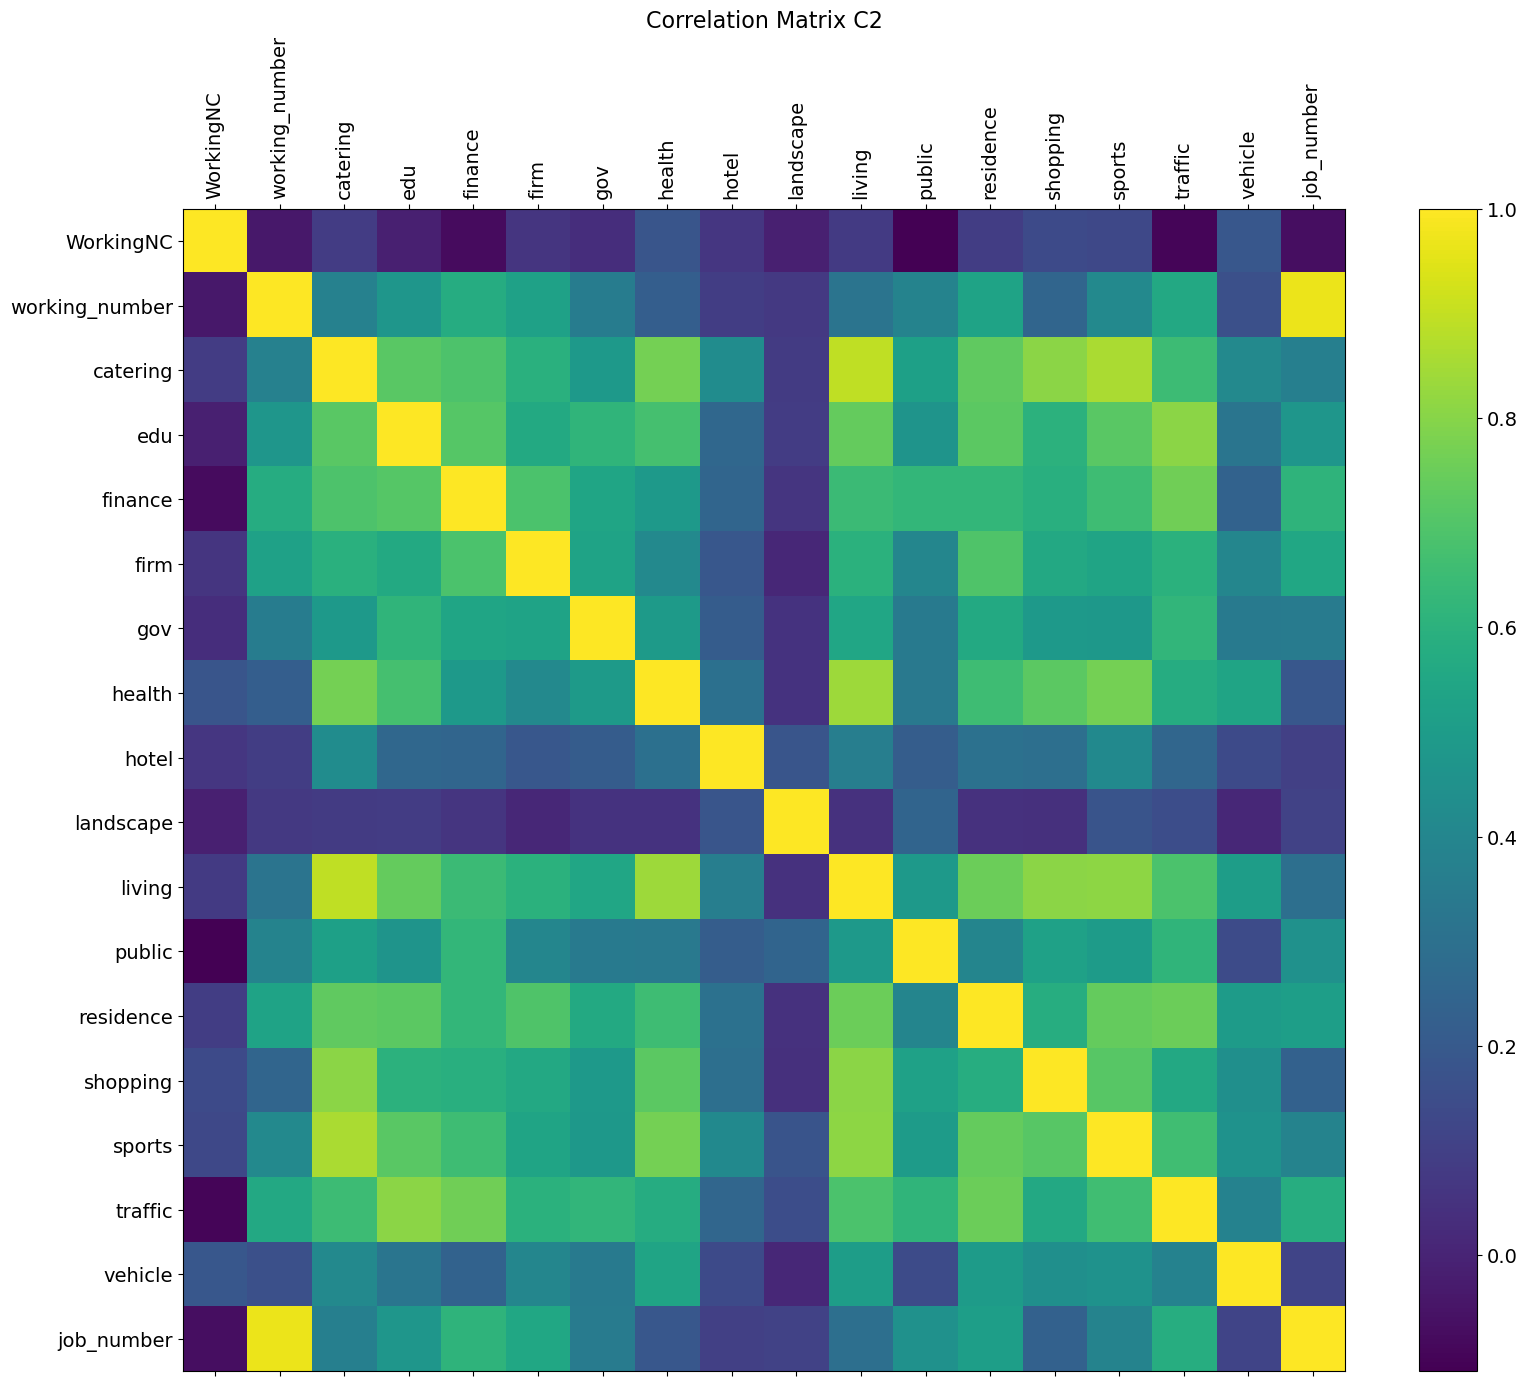

In [33]:
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(dfC2.corr(), fignum=f.number)
plt.xticks(range(dfC2.shape[1]), dfC2.columns, fontsize=14, rotation=90)
plt.yticks(range(dfC2.shape[1]), dfC2.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix C2', fontsize=16)

Text(0.5, 1.0, 'Correlation Matrix C3')

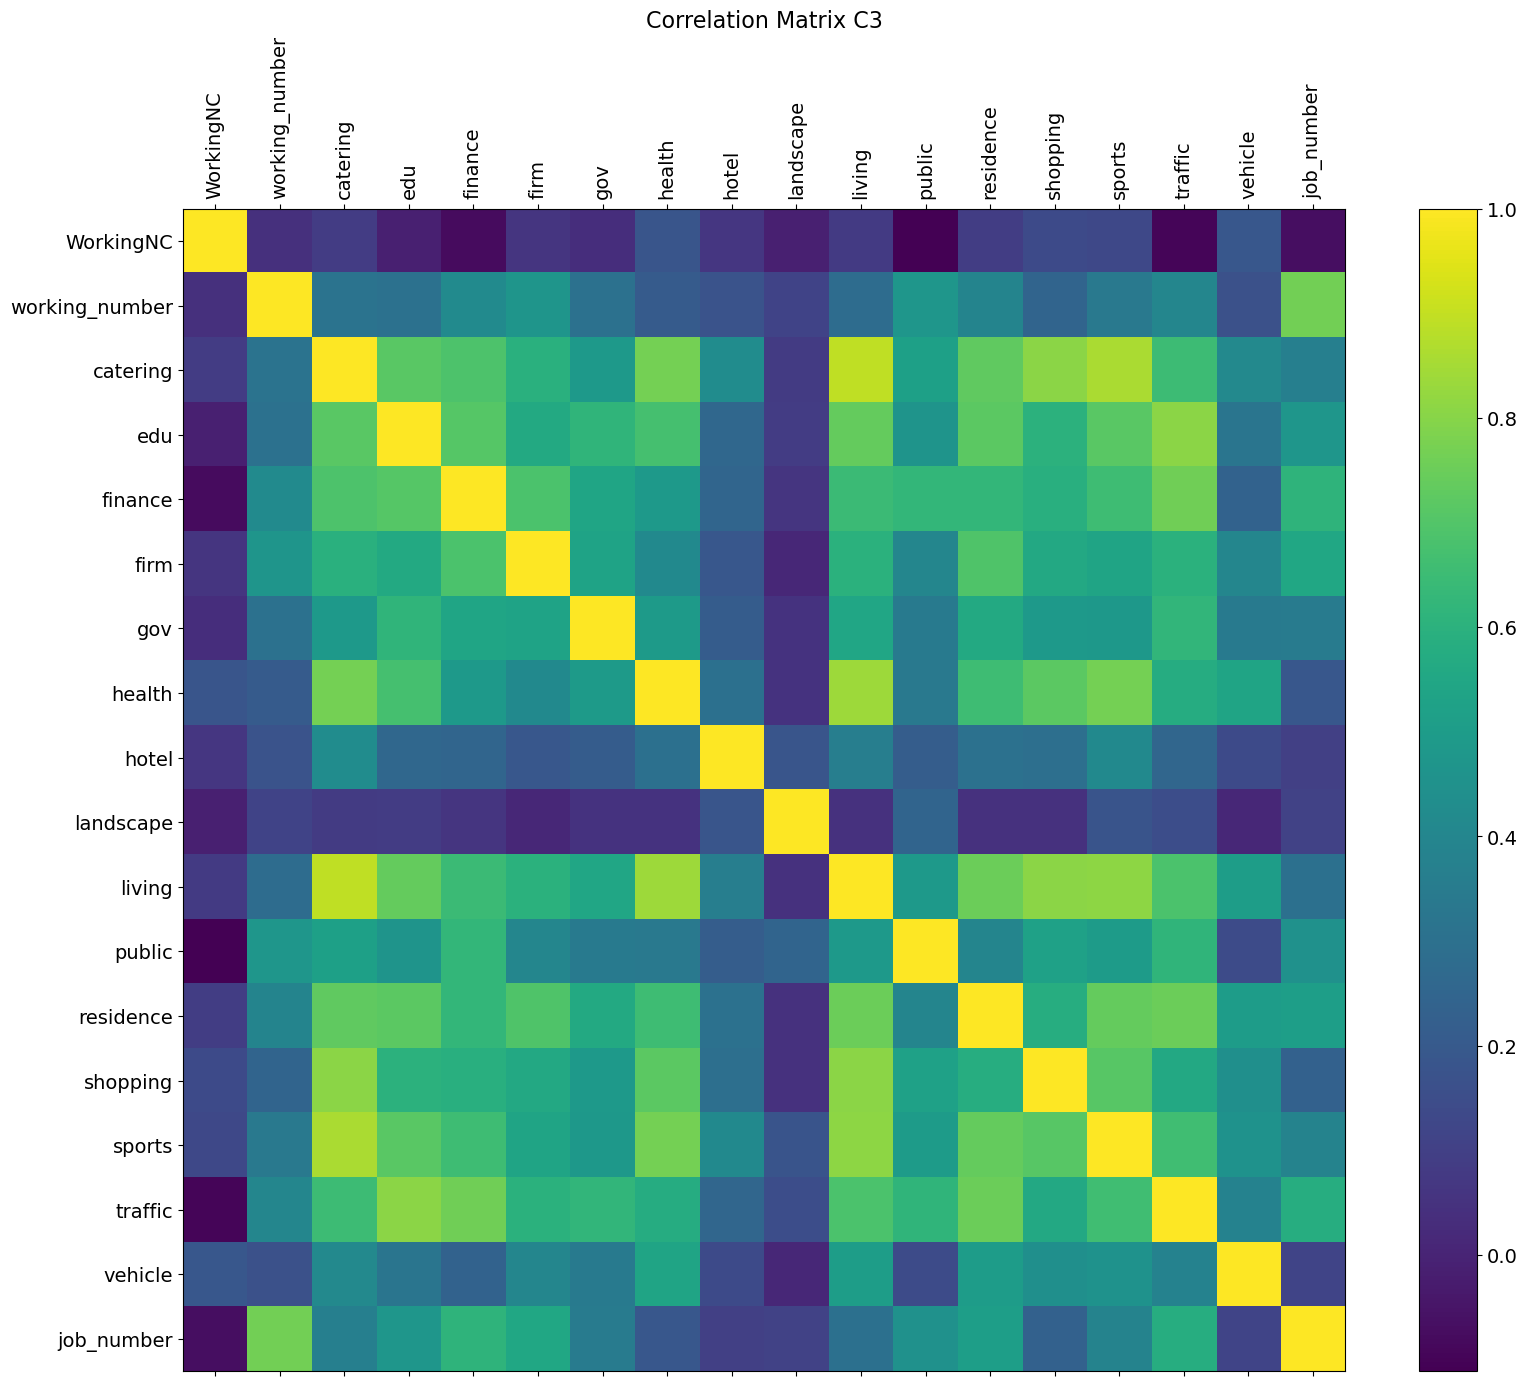

In [35]:
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(dfC3.corr(), fignum=f.number)
plt.xticks(range(dfC3.shape[1]), dfC3.columns, fontsize=14, rotation=90)
plt.yticks(range(dfC3.shape[1]), dfC3.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix C3', fontsize=16)

In [45]:
PearsonC = pd.DataFrame(columns=['name','C1','C2','C3','p_c1','p_c2','p_c3'], index=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])

In [46]:
PearsonC

,name,C1,C2,C3,p_c1,p_c2,p_c3
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Pearson's correlation coefficient 

In [47]:
# Pearson's correlation coefficient 
import scipy.stats as stats
import scipy

In [48]:
temp = dfC1.drop(['WorkingNC'], axis=1)
ColNames = temp.columns
i=0
for col in temp.columns:
    correlation,pvalue=scipy.stats.pearsonr(dfC1['working_number'], temp[col])
    PearsonC.loc[i,'name']=ColNames[i]
    PearsonC.loc[i,'C1']=correlation
    PearsonC.loc[i,'p_c1']=pvalue
    print('working_number and :',ColNames[i],'correlation:',correlation,'pvalue:',pvalue)
    i=i+1

working_number and : working_number correlation: 0.9999999999999998 pvalue: 0.0
working_number and : catering correlation: 0.259108401738094 pvalue: 3.150826027420618e-10
working_number and : edu correlation: 0.43516013571526374 pvalue: 7.893988247574327e-28
working_number and : finance correlation: 0.5911272070891058 pvalue: 3.461518082952292e-55
working_number and : firm correlation: 0.4616093426814597 pvalue: 1.5721448701749506e-31
working_number and : gov correlation: 0.24901056740364408 pvalue: 1.5623003336630282e-09
working_number and : health correlation: 0.04841082258704668 pvalue: 0.2476960556027861
working_number and : hotel correlation: 0.03258333180157803 pvalue: 0.43669765913167685
working_number and : landscape correlation: 0.13397856063955887 pvalue: 0.0013191394706577825
working_number and : living correlation: 0.16737157582249507 pvalue: 5.755951089158181e-05
working_number and : public correlation: 0.3909906015650418 pvalue: 2.470414249193627e-22
working_number and : 

In [49]:
temp = dfC2.drop(['WorkingNC'], axis=1)
ColNames = temp.columns
i=0
for col in temp.columns:
    correlation,pvalue=scipy.stats.pearsonr(dfC2['working_number'], temp[col])
    PearsonC.loc[i,'C2']=correlation
    PearsonC.loc[i,'p_c2']=pvalue
    print('working_number and :',ColNames[i],'correlation:',correlation,'pvalue:',pvalue)
    i=i+1

working_number and : working_number correlation: 1.0 pvalue: 0.0
working_number and : catering correlation: 0.37914568427168527 pvalue: 3.9378995551623024e-21
working_number and : edu correlation: 0.4715881648185121 pvalue: 3.118290408102238e-33
working_number and : finance correlation: 0.5764967900718584 pvalue: 2.5455880994959768e-52
working_number and : firm correlation: 0.5254264629954135 pvalue: 3.4059137964873037e-42
working_number and : gov correlation: 0.35580269716186985 pvalue: 1.244082410866088e-18
working_number and : health correlation: 0.22104051817555226 pvalue: 8.327458550037098e-08
working_number and : hotel correlation: 0.08933379407991623 pvalue: 0.03206165736497238
working_number and : landscape correlation: 0.07266618527009223 pvalue: 0.08142027109509714
working_number and : living correlation: 0.3162181980984735 pvalue: 7.659595106171162e-15
working_number and : public correlation: 0.3876779987879092 pvalue: 4.263235101758094e-22
working_number and : residence cor

In [50]:
temp = dfC3.drop(['WorkingNC'], axis=1)
ColNames = temp.columns
i=0
for col in temp.columns:
    correlation,pvalue=scipy.stats.pearsonr(dfC3['working_number'], temp[col])
    PearsonC.loc[i,'C3']=correlation
    PearsonC.loc[i,'p_c3']=pvalue
    print('working_number and :',ColNames[i],'correlation:',correlation,'pvalue:',pvalue)
    i=i+1

working_number and : working_number correlation: 0.9999999999999999 pvalue: 0.0
working_number and : catering correlation: 0.3107447276580906 pvalue: 2.3221478497518133e-14
working_number and : edu correlation: 0.30251821726260064 pvalue: 1.1782606350990762e-13
working_number and : finance correlation: 0.4211381631295065 pvalue: 3.6312898809095203e-26
working_number and : firm correlation: 0.4698524121506386 pvalue: 5.716767657051933e-33
working_number and : gov correlation: 0.3047660124516768 pvalue: 7.598265310706243e-14
working_number and : health correlation: 0.2100955124089853 pvalue: 3.6140858049996685e-07
working_number and : hotel correlation: 0.17459610459527697 pvalue: 2.513204845228919e-05
working_number and : landscape correlation: 0.11386652146435211 pvalue: 0.006223587132221699
working_number and : living correlation: 0.2806268555870443 pvalue: 6.948667404501994e-12
working_number and : public correlation: 0.47466116397244473 pvalue: 1.057227777477173e-33
working_number a

In [53]:
PearsonC.sort_values(by=['C3'])

,name,C1,C2,C3,p_c1,p_c2,p_c3
8,landscape,0.133979,0.072666,0.113867,0.001319,0.08142,0.006224
15,vehicle,-0.03705,0.161427,0.162534,0.376441,0.0001,0.000089
7,hotel,0.032583,0.089334,0.174596,0.436698,0.032062,0.000025
6,health,0.048411,0.221041,0.210096,0.247696,0.0,0.0
12,shopping,0.112642,0.250696,0.247994,0.007003,0.0,0.0
9,living,0.167372,0.316218,0.280627,0.000058,0.0,0.0
2,edu,0.43516,0.471588,0.302518,0.0,0.0,0.0
5,gov,0.249011,0.355803,0.304766,0.0,0.0,0.0
1,catering,0.259108,0.379146,0.310745,0.0,0.0,0.0
13,sports,0.23941,0.41368,0.337038,0.0,0.0,0.0
